In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.join('..', '..', 'lib'))

plt.rcParams["figure.dpi"] = 200

In [3]:
import nlif_sim_2d_fun_network as netsim

In [9]:
assm = netsim.NEURON_MODELS["three_comp"].assemble()
assm.i_th() * 0.75 * 1e9

0.5624999999999999

In [182]:
rng = np.random.RandomState(41268)
#res = netsim.run_single_spiking_trial(
#    'three_comp', lambda x, y: x * y, intercepts_tar=(-0.95, 0.0), max_rates_tar=(50, 100), intermediate=False, pinh=None, N_epochs=30, rng=rng, reg=1e-6)
res = netsim.run_single_spiking_trial(
    'lif', lambda x, y: 0.5 * (x + y), intermediate=True, pinh=0.3, N_epochs=1, rng=rng, reg=1e-3)

100%|██████████| 1000/1000 [00:00<00:00, 2781.17it/s]


Generating population tuning curves and training data...
Computing intermediate connection weights...


203/203 iterations...

Computing target connection weights...


102/102 iterations...

Computing static errors...
Computing input spike trains...
Computing intermediate spike trains...
Computing target spike trains...
Computing network errors...


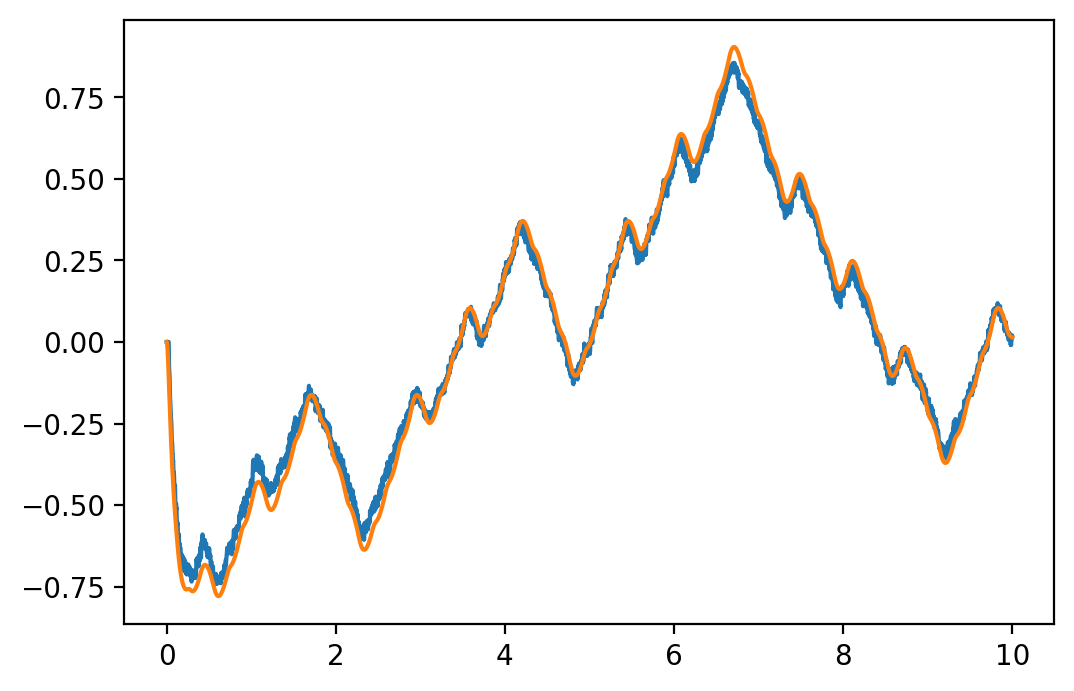

In [183]:
fig, ax = plt.subplots()
ax.plot(res["ts"], res["tar_dec_filt"]);
ax.plot(res["ts"], res["tar_filt"]);

In [184]:
res["errors"]

{'Emodel': 0.02881755194263825,
 'Emodel_int': 0.03129791266822502,
 'Enet': 0.08918958845335288}

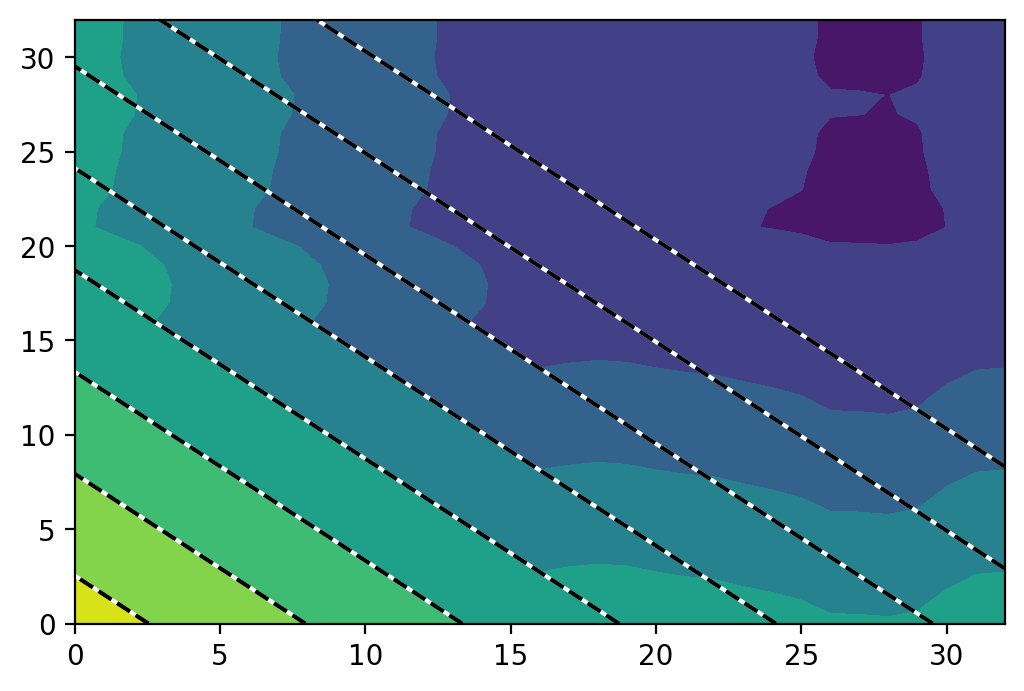

In [16]:
fig, ax = plt.subplots()
i = 30
C = ax.contourf((res["Jtar_opt"][:, i]).reshape(33, 33))
ax.contour((res["Jtar"][:, i]).reshape(33, 33), vmin=0.5e-9, vmax=1e-9, levels=C.levels, colors=['white'], linestyles=['-'])
ax.contour((res["Jtar"][:, i]).reshape(33, 33), vmin=0.5e-9, vmax=1e-9, levels=C.levels, colors=['k'], linestyles=['--'])

In [10]:
res["weights"]["W"]

array([[[7.41211787e-11, 6.01989326e-17, 1.94766885e-11, ...,
         6.27551375e-12, 5.01648000e-12, 9.74717087e-11],
        [8.48403805e-16, 1.32035056e-11, 9.98452089e-12, ...,
         6.66860401e-16, 4.89670149e-16, 8.21266371e-11],
        [1.21682391e-15, 8.52868958e-17, 2.44807209e-11, ...,
         5.43409068e-11, 7.27785290e-11, 1.33074608e-15],
        [1.98444383e-10, 4.20708048e-11, 1.05357136e-15, ...,
         1.87481537e-10, 1.90804092e-10, 1.72159188e-15]],

       [[3.80045712e-16, 1.55840732e-16, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 3.03140002e-10],
        [0.00000000e+00, 2.40732442e-12, 1.64485869e-11, ...,
         0.00000000e+00, 0.00000000e+00, 3.68557564e-10],
        [0.00000000e+00, 0.00000000e+00, 1.92987823e-10, ...,
         2.32051459e-10, 3.44019219e-10, 0.00000000e+00],
        [2.14919679e-10, 9.07014646e-11, 0.00000000e+00, ...,
         6.62886062e-10, 5.66557988e-10, 0.00000000e+00]],

       [[3.85018374e-11, 0.00000000e

In [93]:
res["Ptar"]["gains"][i], \
res["Ptar"]["biases"][i], \
res["Ptar"]["E"][:, i],

(2.640813136845489e-10, 8.937969420808522e-10, array([1.]))

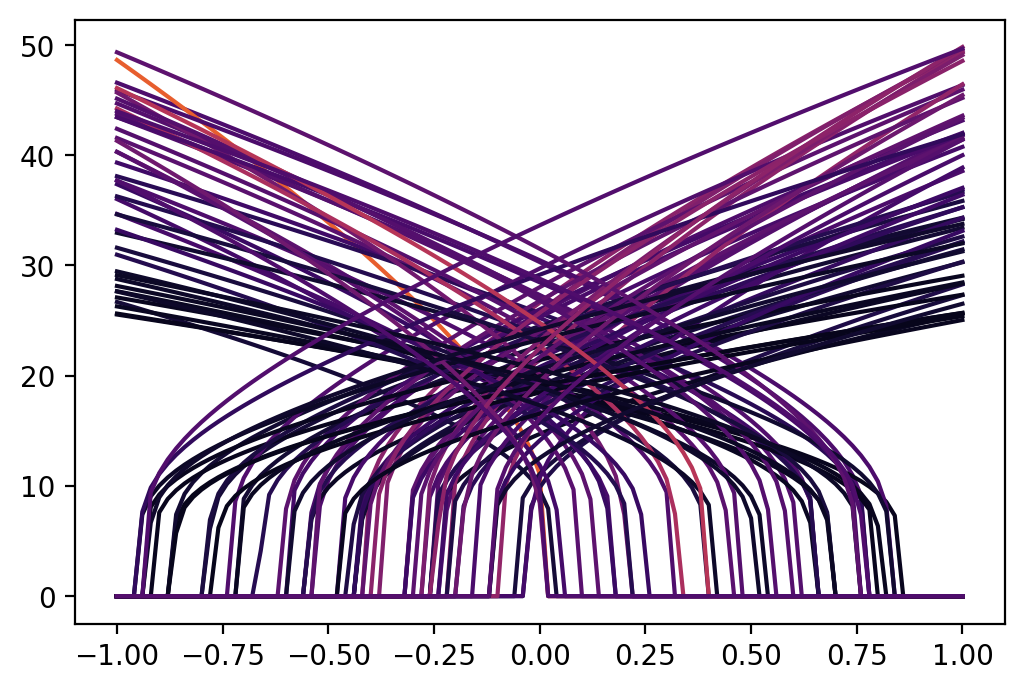

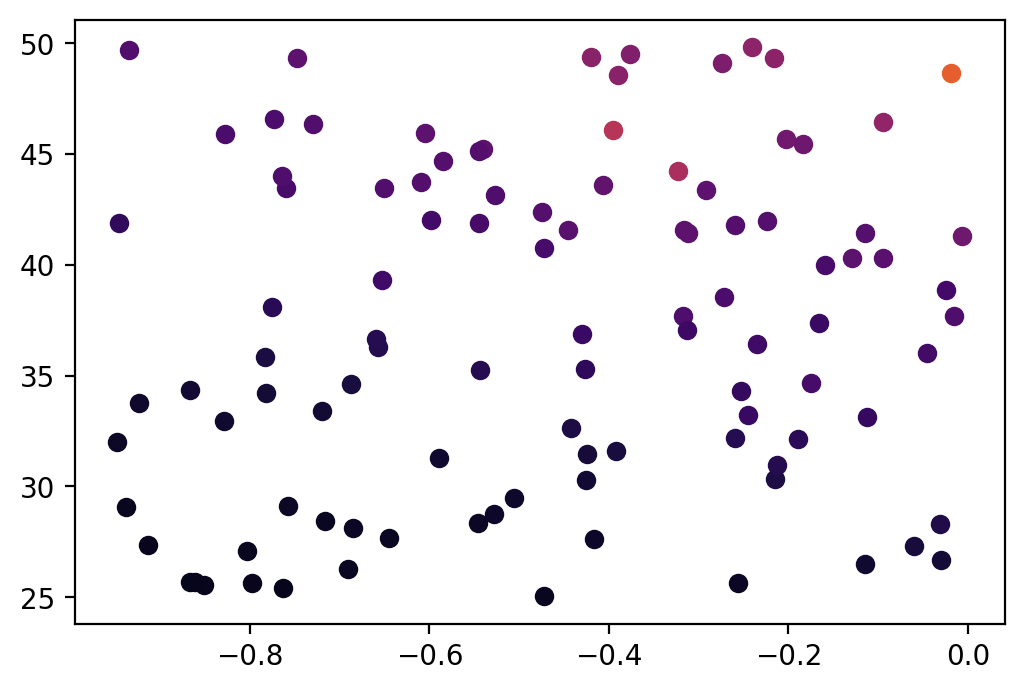

In [94]:
fig, ax = plt.subplots()
_, ax2 = plt.subplots()
xs = np.linspace(-1, 1, 101)
for i in range(res["Ptar"]["n_neurons"]):
    j_dec = np.clip(res["Jtar_opt"][:, i], 0.56e-9, None)
    j_tar = np.clip(res["Jtar"][:, i], 0.56e-9, None)
    err = np.sqrt(np.mean(np.square(j_dec - j_tar))) / np.sqrt(np.mean(np.square(res["Jtar"]))) * 14
    ax.plot(xs, res["Ptar"]["A"](xs.reshape(-1, 1))[:, i], color=mpl.cm.get_cmap('inferno')(err));
    ax2.scatter([res["Ptar"]["icpts"][i]], [res["Ptar"]["maxrs"][i]], c=[mpl.cm.get_cmap('inferno')(err)])